### Text Topic Analysis and Classificaiton by ML

In [1]:
##  Copyright private in 2018 
#  Modify Date: 
#          2018 - 9 - 18 
#  Purpose : 主题模型和文本分析
# 
# ----------

In [1]:
import sys 
sys.version

'2.7.9 (default, Dec 10 2014, 12:28:03) [MSC v.1500 64 bit (AMD64)]'

In [5]:
#coding:utf-8
__author__ = 'naturelanguageprocessing'
import warnings
import numpy
warnings.filterwarnings("ignore")
import jieba
import codecs # codecs 提供的open 方法来指定打开的文件的语言编码，他会在读取的时候
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib 
#matplotlib inline  #嵌入中显示图片显示
matplotlib.rcParams['figure.figsize']  = (10.0,5.0)  # figure size 大小
from wordcloud import WordCloud # 词云

In [4]:
#df  = pd.read_csv('./data/entertainment_news.csv',names = ['url','contenttitle','content','label'],encoding = 'utf-8')
#df  = pd.read_csv(r'C:\Users\H155809\out.csv',encoding = 'utf-8')
#df  = pd.read_csv('C:\\Users\\H155809\\out.csv',encoding = 'utf-8')
df  = pd.read_csv("./data/military_news.csv",encoding = 'utf-8')
df  = df.dropna()  # drop掉可能为空的行数
content  = df.content.values.tolist()  #取出数据中的content列，通过values tolist 转成Python列表

#segment initial
segment = [] #new list - 存储所有分完词的list 
for line in content:
    try:
        segs = jieba.lcut(line)  # lcut:listcut - segs is list
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':  #新闻的文本>1非空 同时不等于换行 等赋值给segment 
                segment.append(seg)
    except:   #异常的话 print line 
        print(line) 
        continue

Building prefix dict from the default dictionary ...
Loading model from cache c:\users\h155809\appdata\local\temp\jieba.cache
Loading model cost 0.519 seconds.
Prefix dict has been built succesfully.


In [4]:
#segment

# (一) 生成词云

### 2.Remove Stopwords

In [6]:
import pandas as pd
words_df = pd.DataFrame({'segment':segment})  #上面分完词后的结果

# 读取stopwords 表
stopwords = pd.read_csv("./data/stopwords_NLP.txt", index_col = False, quoting = 3,sep = "\t",names = ['stopword'], encoding = 'utf-8')
# stopwards.head()

# 3.词频统计
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]  #分完词后的segment 词中，不再停用词当中的词取出来保留。
#print words_df
# 按照sgement 来分组并通过聚合agg 来统计出的频次
words_stat = words_df.groupby(by = ['segment'])['segment'].agg({"计数":numpy.size})

# reset_index来拉平，并且是计数 这一列按照降序排序 ascending = False 
words_stat = words_stat.reset_index().sort_values(by = ["计数"],ascending = False)
words_stat.head() # 从高到低显示

,segment,计数
4149,中国,3661
39156,美国,1881
32122,海军,1880
42623,训练,1771
40575,航母,1768


### 4.画词云

In [7]:
#help(WordCloud)

In [8]:
#type(words_stat)
#words_stat.index

In [9]:
#words_stat.head(100).values

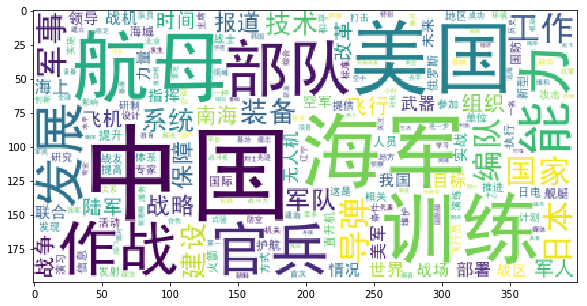

In [10]:
# 指定字体 - simhei.ttf, background is "white" , max font size is 80
"font_path 用于指定载入特定的字体文件..."
wordcloud = WordCloud(font_path = "./data/simhei.ttf",max_words = 200,background_color = "white",width = 400,height =200, max_font_size = 80)

# 取出一部分高频出现的词语做可视化 - Dict 
# x[0] : word  - 是segment
# x[1] : frequency of word - Values  是 "计数"
word_frequency = {x[0]:x[1] for x in words_stat.head(1000).values}  # 取出前1000个词的values的数组构建一个字典
wordcloud      = wordcloud.fit_words(word_frequency)
# show the image
plt.imshow(wordcloud)
plt.show()

### ５.自定义背景图做词云的背景　－　白底

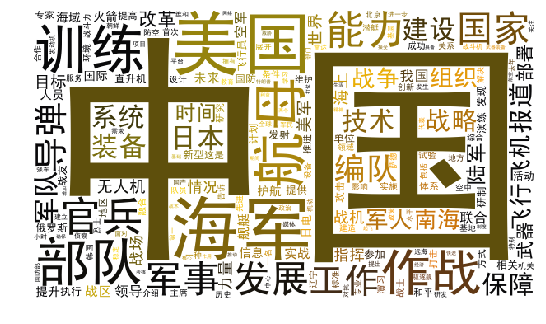

In [11]:
# import lib functions 
from scipy.misc import imread
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)  # Fig size 

from wordcloud import WordCloud,ImageColorGenerator  # Color Generator 
# 读入图片作为模板
bimg  = imread('./image/entertainment.png') 

# wordcloud 初始化: background, font and max font size ； mask 以上述图片作为模板； font_path  = 'data/simhei.ttf 微软雅黑字体
wordcloud = WordCloud(background_color = 'white', mask = bimg, font_path  = 'data/simhei.ttf', max_font_size = 400 )
word_frequency = {x[0]:x[1] for x in words_stat.head(1000).values}  # 取出前1000个词的values 的数组
wordcloud      = wordcloud.fit_words(word_frequency)

bimgColors     = ImageColorGenerator(bimg)  # 通过导入的图片来生成颜色
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func = bimgColors))
plt.show()

# (二) 中文自然语言处理文本分析

### 1.关键词提取  - based on TF - IDF: extract_tags()

In [12]:
### based on TF-IDF 
## function : jieba.analyse.extract_tags(sentence, topK = 20, withWeight = False, allowPOS= ())
## sentence is tested text 
## TopK 返回几个权重最大的几个关键词, default value  = 20
## withWeight 决定是否返回关键词的权重， default value  = False 
## allowPOS 包含指定的词性； 名词或形容词，  default value  = NULL 即不筛选



In [13]:
import jieba.analyse as analyse 
import pandas as pd
df  = pd.read_csv('./data/technology_news.csv',encoding = 'utf-8')
df  = df.dropna()  # drop掉可能为空的行数
lines   = df.content.values.tolist()  #取出数据中的content列，通过values tolist 转成Python列表

# 利用join 函数将所有的文本拼接在一起
content  = "".join(lines)

# --
# 按照空格打印出前30出现频率最高的词
# 按照TF - IDF 计算值抽取出高频的词 - extract_tags()
print "在技术类新闻中出现最高频率的前30个词分别是："
%time print " ".join(analyse.extract_tags(content,topK = 30, withWeight = False, allowPOS = () ))

在技术类新闻中出现最高频率的前30个词分别是：
用户 2016 互联网 手机 平台 人工智能 百度 2017 智能 技术 数据 360 服务 直播 产品 企业 安全 视频 移动 应用 网络 行业 游戏 机器人 电商 内容 中国 领域 通过 发展
Wall time: 14.5 s


### 2.关键词提取 - based on textrank()

In [14]:
## jieba.analyse.textrank(sentence,TopK = 20, withWeight = False, allowPOS = ('ns','n','vn','v')) # 默认是过滤词性的
## 
## 1. 将待抽取关键词的文本进行分类
## 2. 以固定窗口大小（default value = 5 ）, 词与词之间的共同出现的关系构建图
## 3. 计算图中节点的pagerank
## 4. 算法计算比TF-IDF 速度慢

In [15]:
import jieba.analyse as analyse
import pandas as pd
df = pd.read_csv("./data/sports_news.csv", encoding = 'utf-8')
df = df.dropna()
lines  = df.content.values.tolist()
content  = " ".join(lines)

In [16]:
# print - allowPOS 返回词性。默认是过滤词性  v: 动词, n:名词
print "通过Textrank提取主题关键词:"
%time print " ".join(analyse.textrank(content,topK = 20, withWeight = False, allowPOS = ('v','n') ))

通过Textrank提取主题关键词:
足球 球员 赛事 球队 俱乐部 没有 进行 表示 成为 选手 冠军 国际 世界 项目 运动员 记者 球迷 希望 参加 获得
Wall time: 4min 27s


### 3.LDA 主题模型

In [16]:
###　无监督学习　－　抽取一定数量的主题，每个主题的权重从到大到小显示出来
###　找到一堆文本中的主题，发现用户都在关心什么话题

In [17]:
from gensim import corpora, models, similarities
import gensim

### 3.1载入停用词

In [18]:
# load stopwards 
stopwords = pd.read_csv("data/stopwords_NLP.txt", index_col = False, quoting = 3,sep = "\t", names = ['stopword'], encoding = 'utf-8')
stopwords = stopwords['stopword'].values

In [19]:
len(stopwords)

2613

In [23]:
# 转化成合适的数据格式
# 将文本内容处理成固定的格式，一个包含句子的List，每个list中的元素是分词后的词list；
# [[第，一，条，新闻，在这里]， [第二条新闻在这里]， [这是在做什么，]]
#
import jieba.analyse as analyse 
import pandas as pd
df  = pd.read_csv('./data/technology_news.csv',encoding = 'utf-8')
df  = df.dropna()  # drop掉可能为空的行数
lines   = df.content.values.tolist()  #取出数据中的content列，通过values tolist 转成Python列表

sentences = []
for line in lines:
    try:
        segs = jieba.lcut(line)  # jieba分词 - linecut 
        segs = filter(lambda x:len(x)>1, segs)  # 分词后词的数量比1小的是空，filter 掉不需要。
        segs = filter(lambda x:x not in stopwords, segs)  # 分词完的词在stopwords中，同样不需要
        sentences.append(segs)
    except Exception,e:
        print line 
        continue

In [24]:
## check 
for word in sentences[4]:
    print word

本届
大展
看点
无疑
被誉为
全美
科技
第一
神股
伟达
首次
CES
主题
演讲
现场
伟达
创始人
总裁兼
首席
执行官
黄仁勋
揭晓
一套
全新
人工智能
辅助
驾驶
系统
AI
Co
Pilot


### 3.2 Bag of Words Model - 词袋模型

In [22]:
#bag of words - 词袋模型
dictonary = corpora.Dictionary(sentences) # 把 sentences 中的词建成字典(word ->index 映射)
# 通过过词袋模型 将文本转化成数字, 学习下来新的词 - 
corpus    = [dictonary.doc2bow(sentence) for sentence in sentences]


### 3.3 LDA 建模

In [23]:
# 
# topK = 20个主题 and corpus 表示设定好的格式数据
lda = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictonary, num_topics = 20 )

# Topk = 10 and 3nd 分类
# 打印出第3种分类，及该分类中的前10个高频词及权重（权重由大到小显示）
print lda.print_topic(3,topn = 10)

0.019*"小米" + 0.018*"京东" + 0.012*"OTT" + 0.011*"数据安全" + 0.008*"保护" + 0.008*"商品" + 0.006*"政务" + 0.006*"消费者" + 0.005*"武器" + 0.005*"价格"


In [24]:
#help(lda.get_document_topics)

In [25]:
# 打印出主题，主题数目设定为20 ,每个主题里面的数量是8 - 可作为关键主题和信息的提取
for topic in lda.print_topics(num_topics  = 20, num_words = 8):
    print topic[1]


0.028*"网络" + 0.024*"城市" + 0.021*"数据" + 0.013*"报告" + 0.012*"宽带" + 0.011*"智慧" + 0.010*"电信" + 0.010*"建设"
0.014*"系统" + 0.011*"技术" + 0.010*"手机" + 0.008*"功能" + 0.008*"摄像头" + 0.008*"设计" + 0.008*"采用" + 0.007*"充电"
0.033*"人工智能" + 0.032*"智能" + 0.026*"技术" + 0.014*"机器人" + 0.014*"数据" + 0.011*"百度" + 0.009*"学习" + 0.008*"服务"
0.019*"小米" + 0.018*"京东" + 0.012*"OTT" + 0.011*"数据安全" + 0.008*"保护" + 0.008*"商品" + 0.006*"政务" + 0.006*"消费者"
0.024*"企业" + 0.023*"数据" + 0.020*"发展" + 0.018*"互联网" + 0.015*"创新" + 0.013*"产业" + 0.012*"技术" + 0.012*"领域"
0.025*"支付" + 0.019*"亿元" + 0.019*"乐视" + 0.010*"诈骗" + 0.008*"手机" + 0.007*"万元" + 0.007*"交易" + 0.007*"人民币"
0.038*"直播" + 0.028*"内容" + 0.026*"视频" + 0.022*"平台" + 0.016*"媒体" + 0.014*"VR" + 0.010*"分享" + 0.009*"广告"
0.067*"用户" + 0.018*"信息" + 0.009*"搜索" + 0.009*"内容" + 0.009*"视频" + 0.009*"平台" + 0.008*"数据" + 0.006*"推荐"
0.015*"技术" + 0.012*"网络" + 0.011*"电视" + 0.011*"全球" + 0.009*"5G" + 0.008*"发布" + 0.007*"终端" + 0.007*"大会"
0.077*"游戏" + 0.014*"手机" + 0.013*"苹果" + 0.011*"独立" + 0.011*"玩家" + 0.007*"

# (三) 中文自然语言处理文本分类 by ML

### 1. 准备数据

In [57]:
##　准备数据
import jieba
import pandas as pd 

# df_technology
df_technology  = pd.read_csv("./data/technology_news.csv", encoding = 'utf-8')
df_technology  = df_technology.dropna() # 取消可能为空的行数

# df_car
df_car  = pd.read_csv("./data/car_news.csv", encoding = 'utf-8')
df_car  = df_car.dropna()

# df_entertainment 
df_entertainment   = pd.read_csv("./data/entertainment_news.csv", encoding = 'utf-8')
df_entertainment   = df_entertainment.dropna()

# 
df_sprots   = pd.read_csv("./data/sports_news.csv", encoding = 'utf-8')
df_sprots   = df_sprots.dropna()

#
df_military   = pd.read_csv("./data/military_news.csv", encoding = 'utf-8')
df_military   = df_military.dropna()

In [59]:
# 每个种类提取一定数量的文本样本记录
technology  = df_technology.content.values.tolist()[100:2100]
car  = df_car.content.values.tolist()[100:2100]

entertainment  = df_entertainment.content.values.tolist()[100:2100]
sprots  = df_sprots.content.values.tolist()[100:2100]

military = df_military.content.values.tolist()[100:2100]

In [62]:
# print 1 records ramdomly
print "娱乐数据个别样本：\n",entertainment[11]
print "运动数据个边样本:\n",sprots[1]
print "军事题材的个别样本:\n",military[11]

娱乐数据个别样本：
　　因此，有关部门如果真想改善“电影生态”，那么，请放下大棒，拿起喷壶，满腔热情地去浇灌眼前这片网络评论的园地吧！□ 眉间尺
运动数据个边样本:
　　福州市体育总会秘书长王晖说，福建天信职业足球俱乐部将给福州再添文化名片，将推动福州市建立青训体系，为福州足球培养后备人才，传播健康积极的足球文化。
军事题材的个别样本:
　　2014年11月底，时任中国国防部新闻发言人耿雁生首次证实中国海军一艘潜艇曾赴亚丁湾、索马里海域护航，期间两次技术停靠斯里兰卡。他强调，“潜艇靠港进行补给和休整，这是各国海军的通行做法。”


### 2 分词与中文文本分类

In [63]:
# load stopwards 
stopwords = pd.read_csv("./data/stopwords_NLP.txt", index_col = False,names =['stopword'],encoding = 'utf-8',quoting = 3,sep = "\t") # reading 
stopwords = stopwords['stopword'].values # load values 


### 2.1 ML数据集的预处理 ： 去掉空格并打上标签

In [90]:
# Remove stopwords in fucntion 
def preprocess_text(content_lines,sentences,category):
    for line in content_lines:
        try:
            segs = jieba.lcut(line)
            segs = filter(lambda x:len(x)>1, segs)  # 空格 清掉
            segs = filter(lambda x:x not in stopwords, segs)
             
            # 把 sentences 里面的词通过空格链接起来，并打上category 的标签
            sentences.append( (" ".join(segs), category) )
        except Exception, e:
            print line
            continue 

# generated date 
sentences =[]

# 将全部的数据传进来做数据的预处理，并为各个种类带上标签： ‘technology’ and 'car' and so on 
preprocess_text(technology,sentences,'technology')
preprocess_text(car,sentences,'car')

preprocess_text(sprots,sentences,'sprots')
preprocess_text(military,sentences,'military')
preprocess_text(entertainment,sentences,'entertainment')

### 3. 将数据分成测试数据集合和训练数据集之前，先提前打乱数据集合

In [67]:
# 将数据分成测试数据集合和训练数据集之前，先提前打乱数据集合
import random
random.shuffle(sentences)  # 乱序

# print 
for sentence in sentences[:10]:
    print sentence[0],sentence[1]

世界 善良 人会 喜欢 战争 铭记 战争 生命 捍卫 国家 烈士 更要 重视 保护 烈士 纪念 设施 这是 国家 法律法规 体现 后人 历史 铭记 未来 责任 云南省 屏边 绕城 公路 改道 有利于 经济 建设 烈士 遗属 退役 老兵 烈士陵园 祭扫 这才 一举两得 经济 发展 破坏 侵占 烈士陵园 明天 无情 短视 付出 代价 将会 金钱 衡量 military
致公党 党员 剑锋 刘亮 不谋而合 剑锋 政协 云南省 第十一届 委员会 第五次 会议 期间 建议 缅甸 接壤 云南省 德宏州 兴办 职业 培训基地 电子商务 创业园 technology
猎豹 推出 趣味 贺卡 拜年 方式 新年 第一个 来电 提醒 提醒 新年 祝福 到来 别样 富有 心意 technology
中新网 日电 临近 春节 上班族 期盼 拿到 年终奖 高高兴兴 回家 过年 发现 微信 群里 红包 满天飞 时刻 手机 微信 生怕 洗手间 通电话 功夫 错过 几个 保证 用户 工作 娱乐活动 不错 微信 红包 近日 猎豹 浏览器 上线 功能 自动 抢红包 功能 类似 自动 火车票 功能 简化 争抢 流程 自动 红包 智能化 作用 technology
2009 谷歌 公司 推出 无人驾驶 项目 拥有 测试数据 去年 谷歌 项目 转移 母公司 字母表 公司 旗下 创新 企业 Waymo 自主 造车 转向 公司 合作 特斯拉 去年 发生 涉及 自动 驾驶 技术 事故 遭遇 寒冬 优步 自动 驾驶 网约车 业务 因未 加州 许可 遭遇 流产 car
电影 树大招风 前天 祝捷 祝贺 林家栋 该片 夺得 香港电影 评论 学会 最佳 男演员 任贤齐 该片 入围 亚洲 电影 大奖 角逐 影帝 荣升 影帝 林家栋 开心 听到 获奖 那一刻 入行 画面 浮现 眼前 心情 激动 透露 出演 邱礼涛 执导 饰演 盗墓者 entertainment
广州日报 墨尔本 日电 sprots
增加 用户数量 带来 媒体 传播 格局 颠覆性 改变 渗透率 自有 平台 特性 新闻 客户端 各类 媒体 跑马 圈地 争夺 互联网 入口 着力点 technology
优信 集团 成立 持续 稳健 业绩 增长 清晰 商业模式 发展 战略 吸引 包括 美国 华平 百度 腾讯 高瓴 老虎 KKR 君联 在内 多家 实力雄厚 战略 投资人

### 4.Split Data into Train and Test Data Serts 

In [162]:
# Split Data into Train and Test Data Serts 
from sklearn.model_selection import train_test_split

# 拉链函数来把数据的文本内容赋值给x, 标签  ‘technology’ and 'car' and so on  赋值给我label: y

x,y  = zip(*sentences)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 200)

# output 
len(x_train)

7500

### 5.通过词袋模型对文本进行特征提取，找到每个词对应的下标,并以下标作为向量

In [163]:
from sklearn.feature_extraction.text import CountVectorizer  # 向量化计数器

# 在上述通过空格衔接起来的词中取出4000个词，通过CountVectorizer 来找到每个词对应的词向量。该向量统计也会考虑每个词出现的频次
vec  = CountVectorizer(analyzer = 'word', # 按照空格链接起来的词
                      max_features = 4000) #  取出最高频的4000 个词，并以4000词的对应下标值组成一个向量

# 用训练集做fit
vec.fit(x_train)

# 将字符串的np数组x（词语或者一句话）转化成向量
def get_features(x):
    x.transform(x)

### 6. import classifiter to fit data 

### 6.1 导入朴素贝叶斯分类器来训练数据

In [164]:
#  import多项式的朴素贝叶斯模型作为分类器来训练模型
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [165]:
# 将训练文本转化成向量的x_train 丢进来，及标签y_train 作为训练
classifier.fit(vec.transform(x_train),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
### 计算准确率 on test data sets 
classifier.score(vec.transform(x_test),y_test)

0.884

In [167]:
## length of x_test data sets 
len(x_test)

2500

### 7. 引入N-gram 模型做分词处理，N =1,2 : ngram_range = (1,3)，并加大词表数量

In [168]:
from sklearn.feature_extraction.text import CountVectorizer  # 向量化计数器

vec  = CountVectorizer(analyzer = 'word', # 按照空格链接起来的词
                      ngram_range = (1,3), # N-gram 模型 N = 1,2
                     max_features = 20000) #  加大词表数量

# 用训练集做fit
vec.fit(x_train)

# 将字符串的np数组x（词语）转化成向量
def get_features(x):
    x.transform(x)

In [169]:
#训练过程
classifier = MultinomialNB()
# 将训练文本转化成向量的x_train 丢进来，及标签y_train 作为训练
classifier.fit(vec.transform(x_train),y_train)
### 计算准确率 on test data sets 
classifier.score(vec.transform(x_test),y_test)

0.9128

In [159]:
from sklearn.model_selection import StratifiedKFold
#X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
#y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)
print ">>skf is :",skf
for train_index,test_index in skf.split(X,y):
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index],y[test_index]
    
print "X_train", X_train
print "X_test", X_test
print "y_train", y_train
print "y_test", y_test

>>skf is : StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
X_train [[1 2]
 [1 2]]
X_test [[3 4]
 [3 4]]
y_train [0 1]
y_test [0 1]


In [139]:
X

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

### 8. 通过交叉验证集合fit Model - crossvalidation 


In [127]:
help(StratifiedKFold)

Help on class StratifiedKFold in module sklearn.model_selection._split:

class StratifiedKFold(_BaseKFold)
 |  Stratified K-Folds cross-validator
 |  
 |  Provides train/test indices to split data in train/test sets.
 |  
 |  This cross-validation object is a variation of KFold that returns
 |  stratified folds. The folds are made by preserving the percentage of
 |  samples for each class.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n_splits : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |      .. versionchanged:: 0.20
 |          ``n_splits`` default value will change from 3 to 5 in v0.22.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle each stratification of the data before splitting
 |      into batches.
 |  
 |  random_state : int, RandomState instance or None, optional, default=None
 |      If int, random_state is the seed used by the random number generator;
 |      If RandomState inst

In [185]:
# 当前数据为4个种类，这里KFold 成4个部分，三个部分做trian data sets, 1个部分做test data sets
# 通过 KFold 来分类数据
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# K 层抽烟的交叉验证
def stratifiedkfold_cv(x,y,clf_class,shuffle= True,n_folds = 3,**kwargs):
    stratifiedk_fold = StratifiedKFold(n_splits  = n_folds, shuffle = shuffle) # 按照y 标签来类K 折
    
    y_pred  = y[:]   
    for train_index,test_index in stratifiedk_fold.split(x,y):
        X_train, X_test =  x[train_index],x[test_index]
        y_train         =  y[train_index]
        clf  = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        
        y_pred[test_index] = clf.predict(X_test)
    return y_pred 


In [187]:
vec_x = vec.transform(x)
len(y_pred)

10000

In [188]:

help(precision_score)

Help on function precision_score in module sklearn.metrics.classification:

precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    Compute the precision
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : list, optional
        The set of labels to include when ``average != 'binary'``, and their
        ord

In [192]:
NB = MultinomialNB
y_true = y
y_pred = stratifiedkfold_cv(vec.transform(x),np.array(y),NB)
precision_score(y_true,y_pred,labels = None, average = 'macro')


0.9094270786006863

# (四) 整理文本分类Class

In [102]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB

In [103]:
class TextClassifier():
    
    def __init__(self,classifier = MultinomialNB()) :  # 默认是朴素贝叶斯模型
        self.classifier = classifier 
        self.vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 2000)
        
    def features(self,X):
        return self.vectorizer.transform(X)  # 将文本转化成向量
    
    def fit(self,X,y):
        self.vectorizer.fit(X)
        self.classifier.fit(self.features(X), y)
        
    def predict(self,x):
        return self.classifier.predict(self.features([x]))
    
    def score(self,X,y):
        return self.classifier.score(self.features(X),y)

In [119]:
## class的调用
classifier  = TextClassifier()
classifier.fit(x_train,y_train)

# prediction & score 
print(classifier.predict('融资　是　创业　很难　做到　的　事情'))
print(classifier.score(x_test,y_test))

['technology']
0.83


# (五) SVM Text Classifier 

In [105]:
# 
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(vec.transform(x_train),  y_train)
svm.score(vec.transform(x_test), y_test)

0.8356

In [82]:
# RBF Kernal - 高斯核 -速度比较慢
from sklearn.svm import SVC
svm = SVC() # 默认RBF Kernal
svm.fit(vec.transform(x_train),  y_train)
svm.score(vec.transform(x_test), y_test)

0.1876

In [86]:
# 换一个特征提取模型
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [106]:
class TextClassifier():
    
    def __init__(self,classifier = SVC(kernel = 'linear')) :  # 默认是线性SVM
        self.classifier = classifier 
        self.vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,3), max_features = 2000)
        
    def features(self,X):
        return self.vectorizer.transform(X)  # 将文本转化成向量
    
    def fit(self,X,y):
        self.vectorizer.fit(X)
        self.classifier.fit(self.features(X), y)
        
    def predict(self,x):
        return self.classifier.predict(self.features([x]))
    
    def score(self,X,y):
        return self.classifier.score(self.features(X),y)

In [107]:
## class的调用
classifier  = TextClassifier()
classifier.fit(x_train,y_train)

# prediction & score 
print(classifier.predict('现 在 的 网 速 真 是 实 在 的 差'))
print(classifier.score(x_test,y_test))

['military']
0.83
